In [5]:
from bs4 import BeautifulSoup
import urllib3
import pandas as pd
from unidecode import unidecode
import time

# ASK = input("What type of car you want? ")
# PATH = 'https://divar.ir'
# URL = f'{PATH}/s/iran/auto?q={ASK}'
# EXTRACT = "post-list__items-container-e44b2"


PATH = "https://divar.ir"
URL = f"{PATH}/s/iran/auto?q=206"
EXTRACT = "post-list__items-container-e44b2"
ENV_TOKEN = {
            'colume_4' : {'خط و خش جزیی':85
                           ,'رنگ‌شدگی':45
                           ,'سالم و بی‌خط و خش':100 
                           ,'دوررنگ':10},
             'colume_3' : {'سالم و پلمپ':90, 
                           'ضربه‌خورده':10},
             'colume_6' : {'اتوماتیک':1, 
                           'دنده\u200cای':0}
}



def Requests(path_req, class_type=None):
    req = urllib3.PoolManager()
    res = req.request('GET', path_req)
    print(res.status)
    soup = BeautifulSoup(res.data, 'html.parser')
    data = soup.findAll('div', {'class':class_type})[0]
    return data


data = Requests(URL, EXTRACT)

200


In [8]:
def ExtractDataFromSite():
    time.sleep(5)
    try:
        data = Requests(URL, EXTRACT)
        time.sleep(10)
        all_values_together = []
        cnt = 0
        # for d in data.findAll('div', {'class':"post-list__widget-col-c1444"}):
        for a in data.find_all('a', href=True):
            data_path = a['href']
            NEW_URL = PATH + data_path
            time.sleep(10)
            datasets = Requests(NEW_URL, class_type="post-page__section--padded")
            time.sleep(10)
            rows = datasets.findAll('div', 
                        {'class':"kt-base-row kt-base-row--large kt-unexpandable-row"})
            col_row = {}
            token = {}
            for i, row in enumerate(rows):
                key_value = row.get_text(separator=',')
                if i<=1:
                    pass
                elif i==len(rows)-1:
                    col_row['price'] = float(unidecode(key_value.split(',')[1].split(' ')[0]).replace(',', ''))
                elif key_value.split(',')[1]=='مهلت بیمهٔ شخص ثالث' or key_value.split(',')[1]=='سالم':
                    pass
                else:
                    if key_value.split(',')[1]=='شاسی جلو' or key_value.split(',')[1]=='شاسی عقب':
                        print("Find")
                        token[f'colume_{i}'] = key_value.split(',')[0]
                        col_row[f'colume_{i}'] = key_value.split(',')[1]
                    else:
                        token[f'colume_{i}'] = key_value.split(',')[0]
                        col_row[f'colume_{i}'] = key_value.split(',')[1]
            count = 10     
            for conts, keys in zip(datasets.find_all('td')[:-1], datasets.find_all('th')[:-1]):
                col_row[f'colume_{count}'] = int(float(unidecode(conts.contents[0]).replace(',', '')))
                token[f'colume_{count}'] = keys.text
                count += 1

            col_row['url'] = NEW_URL
            all_values_together.append(col_row)
            print(f'Done. URL: {NEW_URL}, {cnt}')
            cnt += 1
            if cnt==20:
                break
            

    except Exception as error:
        print("Request is Refus please try again." , error)

    return all_values_together, token


dataset, token = ExtractDataFromSite()
print(f"Dataset is: {dataset}, Token is: {token}")

Done. URL: https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۸۷/QZ-XoA0d, 0
Done. URL: https://divar.ir/v/پژو-۲۰۶-تیپ-۲-سالم-درجه-۱/QZ_f-WUW, 1
Done. URL: https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۹۸/QZyT9_jw, 2
Done. URL: https://divar.ir/v/پژو-206-sd-v6-مدل-۱۳۸۶/gZCwtozY, 3
Dataset is: [{'colume_2': 'سالم', 'colume_3': 'سالم و پلمپ', 'colume_4': 'رنگ\u200cشدگی', 'colume_5': '۴ ماه', 'colume_6': 'دنده\u200cای', 'price': 270000000.0, 'colume_10': 270000, 'colume_11': 1387, 'url': 'https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۸۷/QZ-XoA0d'}, {'colume_2': 'سالم', 'colume_3': 'سالم و پلمپ', 'colume_4': 'سالم و بی\u200cخط و خش', 'colume_5': '۶ ماه', 'colume_6': 'دنده\u200cای', 'price': 280000000.0, 'colume_10': 140000, 'colume_11': 1387, 'url': 'https://divar.ir/v/پژو-۲۰۶-تیپ-۲-سالم-درجه-۱/QZ_f-WUW'}, {'colume_2': 'سالم', 'colume_3': 'سالم و پلمپ', 'colume_4': 'رنگ\u200cشدگی', 'colume_5': '۱۲ ماه', 'colume_6': 'دنده\u200cای', 'price': 410000000.0, 'colume_10': 87000, 'colume_11': 1398, 'url': 'https://divar.ir

In [15]:
len(dataset), token

(4,
 {'colume_2': 'وضعیت موتور',
  'colume_3': 'وضعیت شاسی\u200cها',
  'colume_4': 'وضعیت بدنه',
  'colume_5': 'مهلت بیمهٔ شخص ثالث',
  'colume_6': 'گیربکس',
  'colume_10': 'کارکرد',
  'colume_11': 'مدل (سال تولید)'})

In [12]:
for data in dataset:
    for key in data.keys():
        try:
            data[key] = ENV_TOKEN[key][data[key]]
        except Exception as cannot:
            pass
    

In [13]:
for index, data in enumerate(dataset):
    if index==0:
        df = pd.DataFrame([data])
    else:
        df.loc[len(df)] = data
    

In [14]:
df

,colume_2,colume_3,colume_4,colume_5,colume_6,price,colume_10,colume_11,url
0,سالم,90,45,۴ ماه,0,270000000.0,270000,1387,https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۸۷/QZ-X...
1,سالم,90,100,۶ ماه,0,280000000.0,140000,1387,https://divar.ir/v/پژو-۲۰۶-تیپ-۲-سالم-درجه-۱/Q...
2,سالم,90,45,۱۲ ماه,0,410000000.0,87000,1398,https://divar.ir/v/پژو-206-تیپ-۲-مدل-۱۳۹۸/QZyT...
3,سالم,90,100,۱۱ ماه,0,315000000.0,300000,1386,https://divar.ir/v/پژو-206-sd-v6-مدل-۱۳۸۶/gZCw...


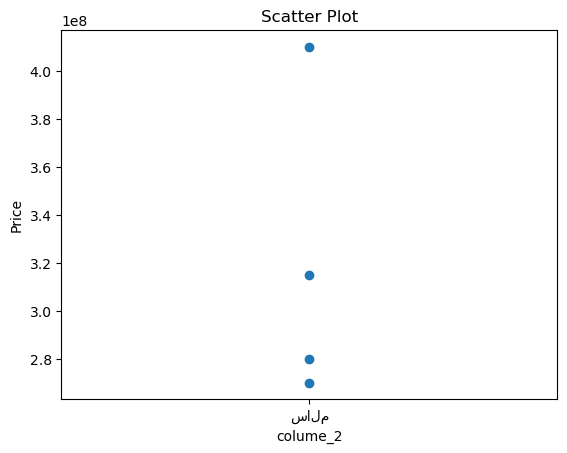

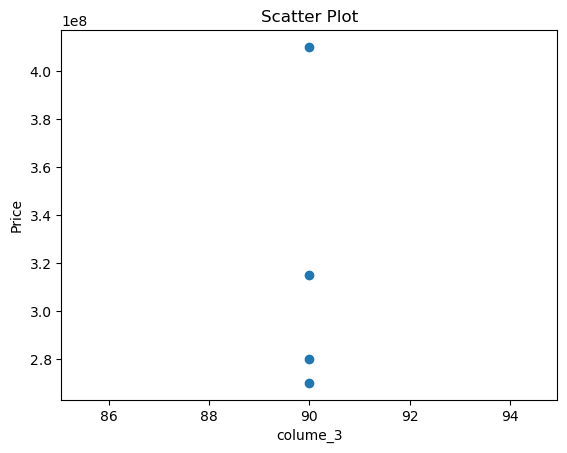

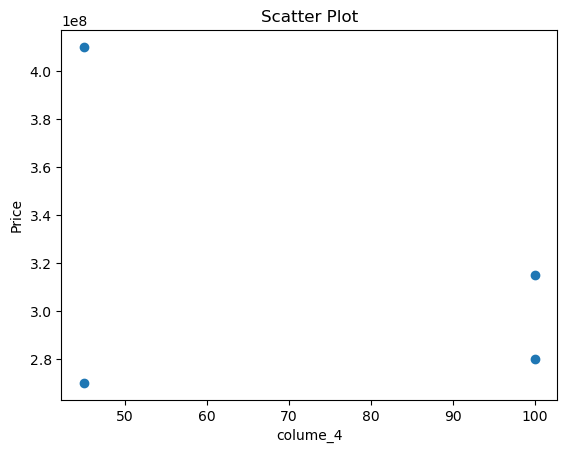

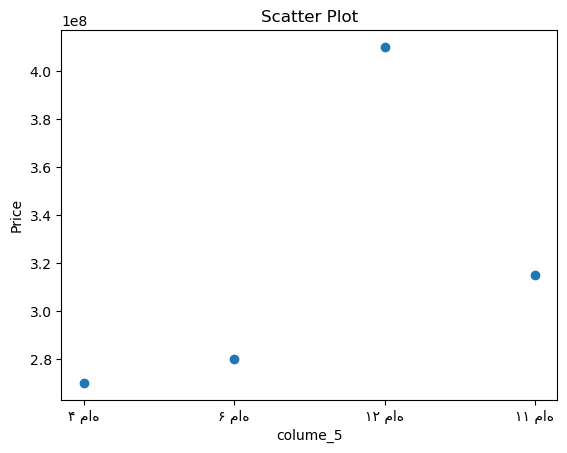

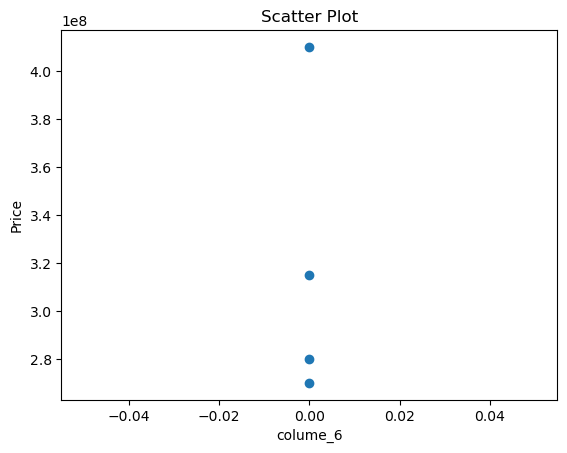

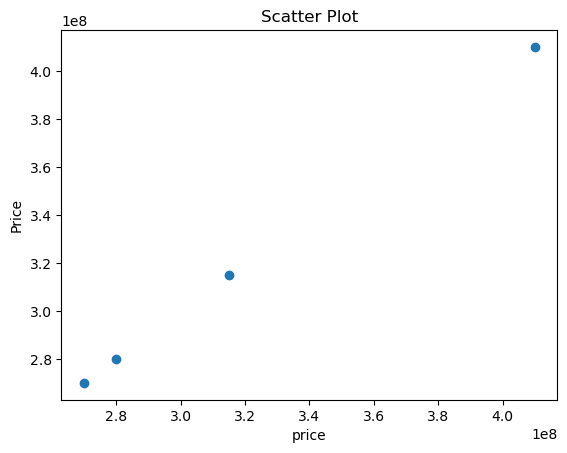

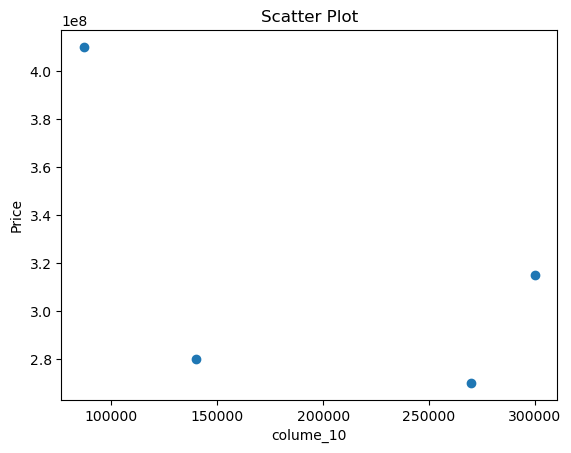

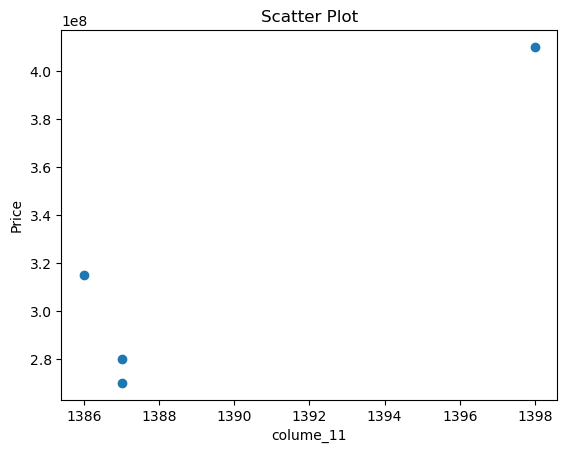

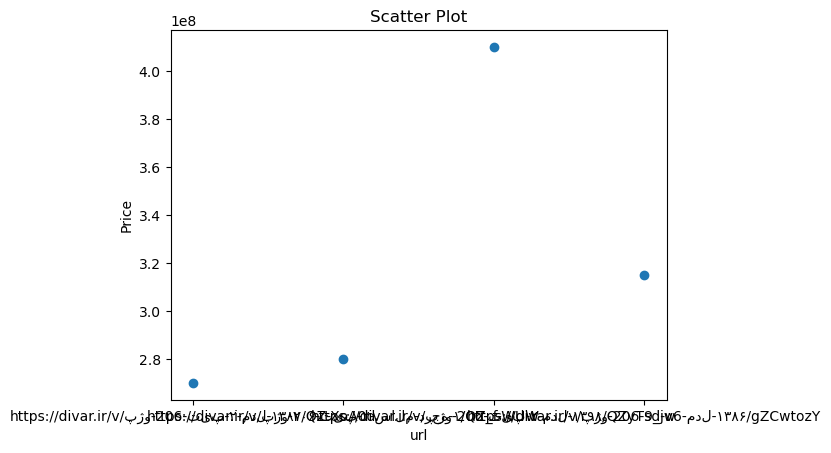

In [16]:
import matplotlib.pyplot as plt

for col in df.columns:
    plt.scatter(df[col], df['price'])
    plt.title("Scatter Plot")
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

In [17]:
token

{'colume_2': 'وضعیت موتور',
 'colume_3': 'وضعیت شاسی\u200cها',
 'colume_4': 'وضعیت بدنه',
 'colume_5': 'مهلت بیمهٔ شخص ثالث',
 'colume_6': 'گیربکس',
 'colume_10': 'کارکرد',
 'colume_11': 'مدل (سال تولید)'}